<a href="https://colab.research.google.com/github/kusawokoshitemori/MachineLearningPractice/blob/main/MachineLearningPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


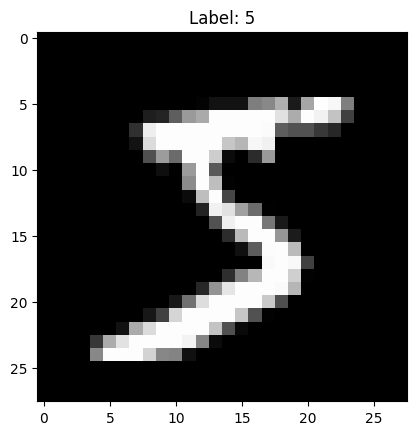

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNISTデータを取得
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 画像を表示
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [2]:
# 画像データを0〜1に正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Normalized data:", train_images[0])


Normalized data: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8673 - loss: 0.4319 - val_accuracy: 0.9664 - val_loss: 0.1133
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9633 - loss: 0.1268 - val_accuracy: 0.9725 - val_loss: 0.0935
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9720 - loss: 0.0940 - val_accuracy: 0.9782 - val_loss: 0.0763
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9763 - loss: 0.0770 - val_accuracy: 0.9735 - val_loss: 0.0919
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9798 - loss: 0.0688 - val_accuracy: 0.9759 - val_loss: 0.0861
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9820 - loss: 0.0588 - val_accuracy: 0.9813 - val_loss: 0.0727
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9839 - loss: 0.0521 - val_accuracy: 0.9811 - val_loss: 0.0745
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9850 -

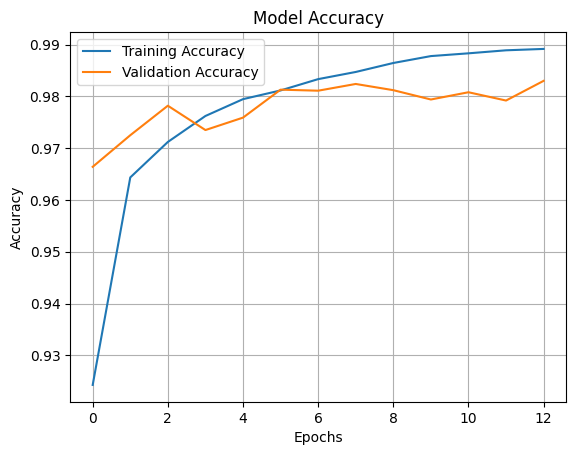

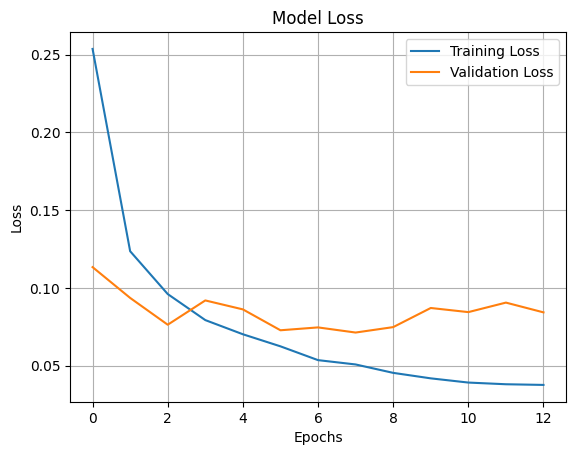

In [10]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# 複雑なモデル 0.9824
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# 単純なモデル 0.9781
# model = models.Sequential([
#     layers.Flatten(input_shape=(28, 28)),  # 28x28 の画像を 1 次元に変換
#     layers.Dense(128, activation='relu'),  # 隠れ層1
#     layers.Dense(10, activation='softmax') # 出力層（10 クラス分類）
# ])

# アーリーストッピングの設定
early_stopping = EarlyStopping(
    monitor='val_loss',   # 監視対象（'val_loss' or 'val_accuracy'）
    patience=5,           # 5エポック改善しなかったらストップ
    restore_best_weights=True  # 最も良い重みを復元
)

# モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習
hist = model.fit(train_images, train_labels,
                 epochs=50,
                 validation_data=(test_images, test_labels),
                 callbacks=[early_stopping])

# === 学習の可視化 ===
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 損失の推移をプロット
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [7]:
import numpy as np

# 学習後、最初の1つのデータに対して予測
predictions = model(train_images[:3]).numpy()

# ソフトマックスで確率に変換
probabilities = tf.nn.softmax(predictions)

# 確率をNumPy配列に変換
probabilities_np = probabilities.numpy()

# NumPyでの表示設定を変更
np.set_printoptions(precision=3, suppress=True)

# 確率を表示
print(probabilities_np)

print(train_labels[:3])

[[0.085 0.085 0.085 0.085 0.085 0.232 0.085 0.085 0.085 0.085]
 [0.232 0.085 0.085 0.085 0.085 0.085 0.085 0.085 0.085 0.085]
 [0.085 0.085 0.085 0.085 0.231 0.085 0.085 0.085 0.085 0.086]]
[5 0 4]


In [8]:
import numpy as np

# 学習後、最初の1つのデータに対して予測
predictions = model(test_images[:3]).numpy()

# ソフトマックスで確率に変換
probabilities = tf.nn.softmax(predictions)

# 確率をNumPy配列に変換
probabilities_np = probabilities.numpy()

# NumPyでの表示設定を変更
np.set_printoptions(precision=3, suppress=True)

# 確率を表示
print(probabilities_np)

print(test_labels[:3])

[[0.085 0.085 0.085 0.085 0.085 0.085 0.085 0.232 0.085 0.085]
 [0.085 0.085 0.232 0.085 0.085 0.085 0.085 0.085 0.085 0.085]
 [0.085 0.232 0.085 0.085 0.085 0.085 0.085 0.085 0.085 0.085]]
[7 2 1]


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0886
Test accuracy: 0.9824000000953674
